In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28)),         # Input layer
    Dense(128, activation='relu'),         # Hidden layer 1
    Dense(64, activation='relu'),          # Hidden layer 2
    Dense(10, activation='softmax')        # Output layer
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


2025-08-13 10:39:57.041165: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-13 10:39:57.052620: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-13 10:39:57.142062: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-13 10:39:57.210530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755059997.293160    8285 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755059997.31

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8701 - loss: 0.4445 - val_accuracy: 0.9673 - val_loss: 0.1128
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9673 - loss: 0.1089 - val_accuracy: 0.9687 - val_loss: 0.0992
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9776 - loss: 0.0727 - val_accuracy: 0.9773 - val_loss: 0.0757
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0519 - val_accuracy: 0.9775 - val_loss: 0.0847
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9867 - loss: 0.0415 - val_accuracy: 0.9770 - val_loss: 0.0847
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.0930
Test accuracy: 0.9763000011444092


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted digit: 0


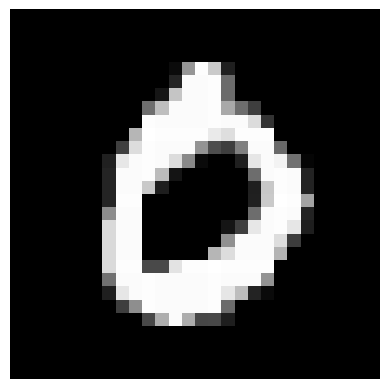

In [4]:

# Pick one test image

test_image = x_test[3] 

prediction = model.predict(test_image[np.newaxis, ...])
predicted_label = np.argmax(prediction)
print("Predicted digit:", predicted_label)

plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.show()